In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("HR.csv")

In [3]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [6]:
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

# Data Preprocessing

In [8]:
df.duplicated().sum()

3008

In [9]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
df1 = df.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
print(df1['left'].value_counts())
print()

print('Percentages:')
print((df1['left'].value_counts(normalize=True))*100)

0    10000
1     1991
Name: left, dtype: int64

Percentages:
0    83.39588
1    16.60412
Name: left, dtype: float64


# Exploratory Data Analysis

<Axes: xlabel='number_project', ylabel='Count'>

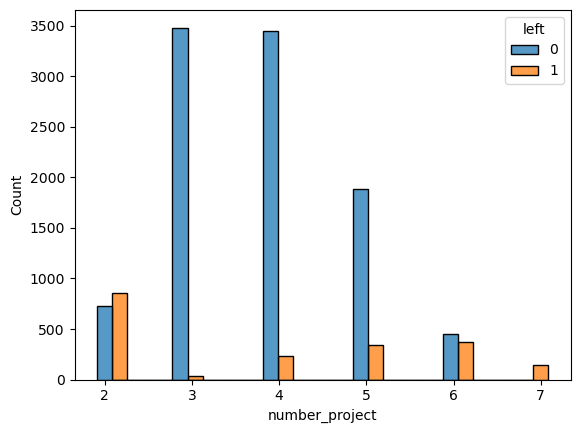

In [12]:
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2)

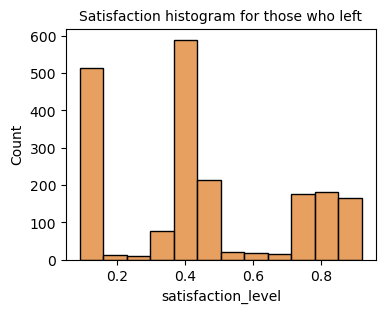

In [13]:
plt.figure(figsize=(4,3))
tenure_left = df1[df1['left']==1]['satisfaction_level']
sns.histplot(data=tenure_left, color ='#e1812b')
plt.title('Satisfaction histogram for those who left', fontsize='10')
plt.show()

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

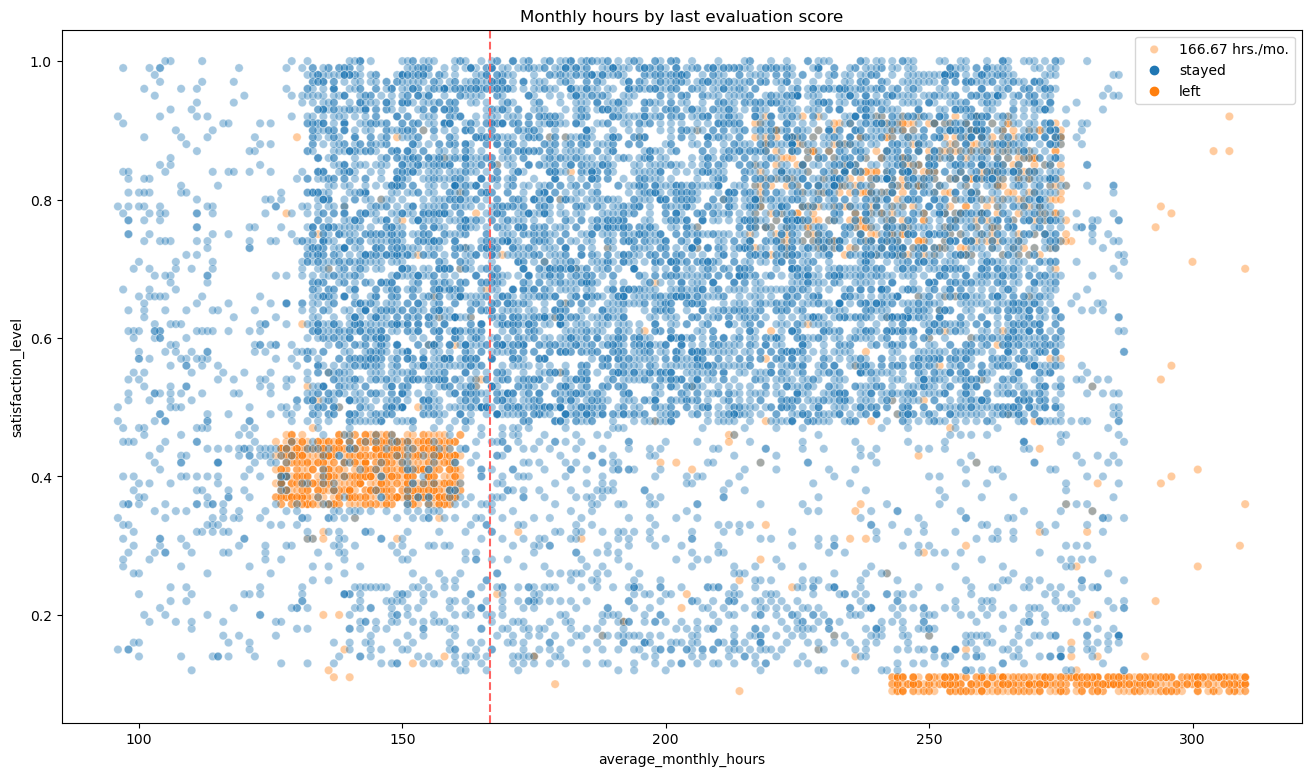

In [14]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.7, color='#ff6361', label='166.7 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='12')

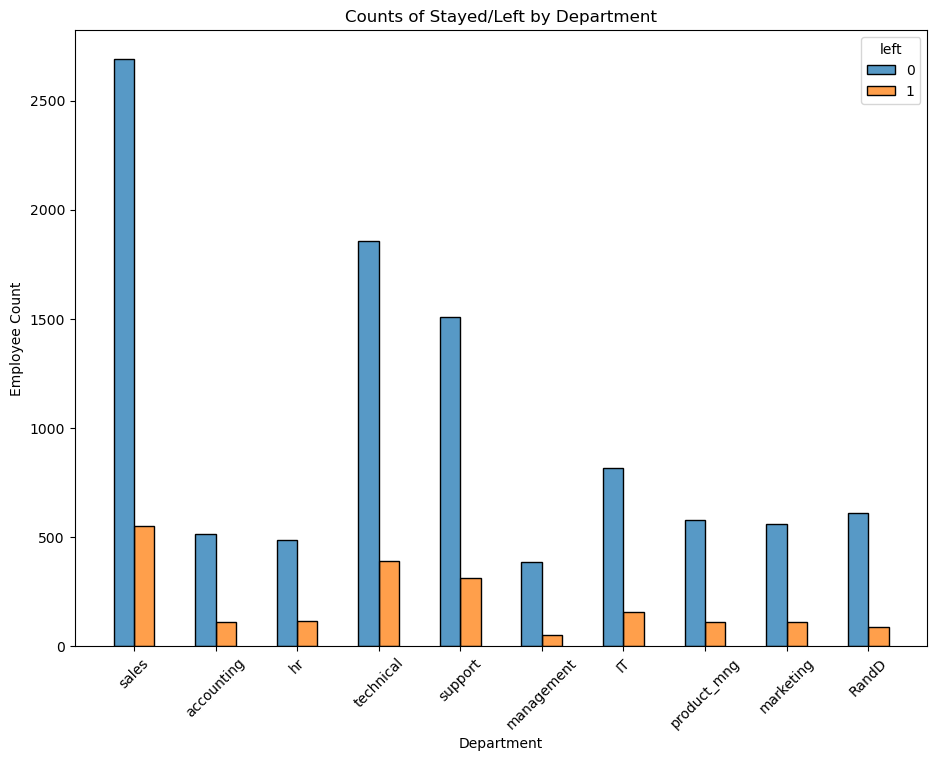

In [15]:
plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of Stayed/Left by Department', fontsize=12)
plt.ylabel('Employee Count')
plt.xlabel('Department')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

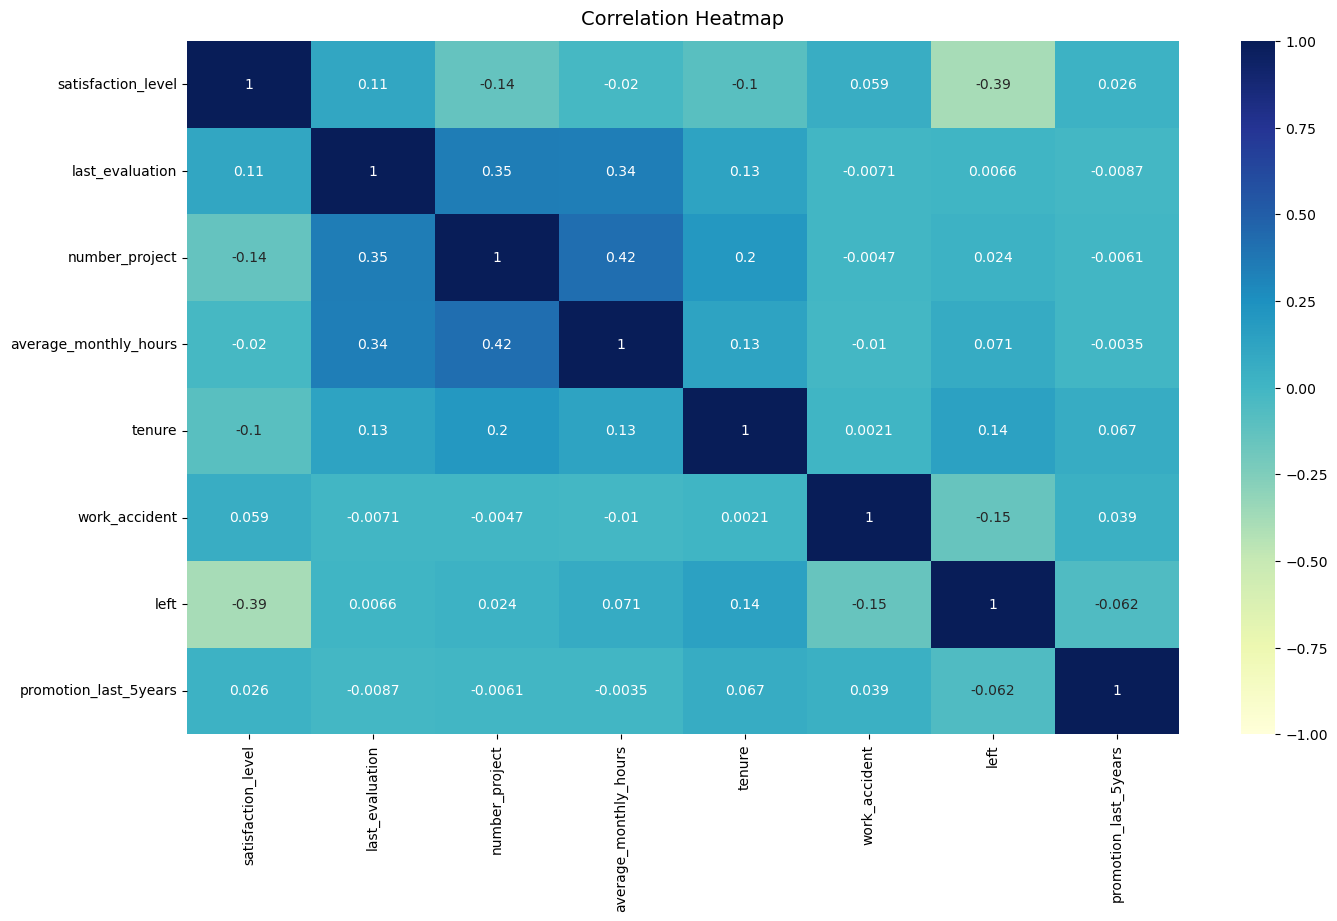

In [16]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'work_accident', 'left','promotion_last_5years']].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("YlGnBu", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

In [17]:
satisfaction_array = np.array(df['satisfaction_level'])
average_satisfaction = np.mean(satisfaction_array)
print("Average satisfaction level of employees is {} %".format(round(average_satisfaction*100)))

Average satisfaction level of employees is 61 %


In [18]:
df_aggre = df.groupby('department').agg({"satisfaction_level" : "mean"})
df_aggre

,satisfaction_level
department,
IT,0.618142
RandD,0.619822
accounting,0.582151
hr,0.598809
management,0.621349
marketing,0.618601
product_mng,0.619634
sales,0.614447
support,0.618300


In [19]:
df_aggre_2 = df.groupby('salary').agg({"satisfaction_level" : "mean"})
df_aggre_2

,satisfaction_level
salary,
high,0.637470
low,0.600753
medium,0.621817


In [20]:
df_aggre_3 = df.groupby('left').agg({"satisfaction_level" : "mean"})
df_aggre_3

,satisfaction_level
left,
0,0.666810
1,0.440098


In [21]:
df_aggre_4 = df.groupby('department').agg({"left" : "count"})
df_aggre_4

,left
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [22]:
df['salary'] = df['salary'].map({"low":0,"medium":1,"high":2})
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1


In [23]:
df['Department'] = df['department'].map({"IT":0,"RandD":1,"accounting":2,"hr":3,"management":4,"marketing":5,"product_mng":6,"sales":7,"support":8,"technical":9})
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,Department
0,0.38,0.53,2,157,3,0,1,0,sales,0,7
1,0.80,0.86,5,262,6,0,1,0,sales,1,7
2,0.11,0.88,7,272,4,0,1,0,sales,1,7


In [24]:
features = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','tenure','work_accident','promotion_last_5years']
input_data = df[features]
input_data = np.array(input_data)
input_data

array([[0.38, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 6.  , 0.  , 0.  ],
       [0.11, 0.88, 7.  , ..., 4.  , 0.  , 0.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 3.  , 0.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 4.  , 0.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 3.  , 0.  , 0.  ]])

# Scaling Data 

In [25]:
scaler = MinMaxScaler()
scaler.fit(input_data)
new = scaler.transform(input_data)
new

array([[0.31868132, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.5       , 0.        ,
        0.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.25      , 0.        ,
        0.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.125     , 0.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.25      , 0.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.125     , 0.        ,
        0.        ]])

In [26]:
target = np.array(df['left'])
target

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Model Training

In [27]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(new,target)
alg = LogisticRegression()
alg.fit(xtrain,ytrain)
ypred = alg.predict(xtest)
acc = accuracy_score(ytest,ypred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 75.44


In [28]:
log_cm = confusion_matrix(ytest, ypred, labels=alg.classes_)

In [29]:
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=alg.classes_)

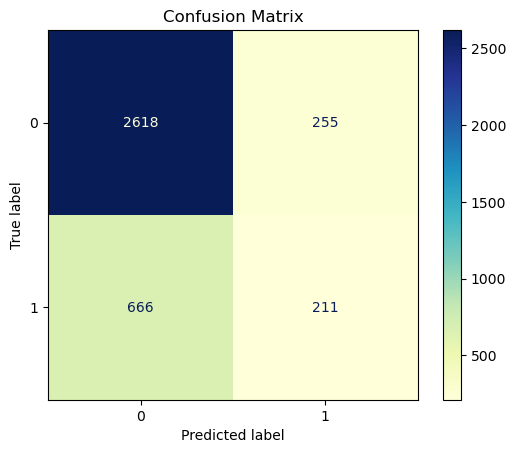

In [32]:
log_disp.plot(values_format='', cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix")
plt.show()

In [31]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(ytest, ypred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.80      0.91      0.85      2873
    Predicted would leave       0.45      0.24      0.31       877

                 accuracy                           0.75      3750
                macro avg       0.62      0.58      0.58      3750
             weighted avg       0.72      0.75      0.73      3750

